In [2]:
import pandas as pd
import seaborn as sns
import soccerdata as sd

pd.set_option("display.max_columns", None)

[11/03/24 18:56:54] INFO     No custom team name replacements found. You can configure these in       ]8;id=948085;file://C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=857501;file://C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_config.py#90\90]8;;\
                             C:\Users\persi\soccerdata\config\teamname_replacements.json.                          

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=798215;file://C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=470648;file://C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_config.py#196\196]8;;\
                             C:\Users\persi\soccerdata\config\league_dict.json.                                    

In [3]:
fb = sd.FBref(leagues=['Big 5 European Leagues Combined'], seasons=[1718, 1819,2021, 2122, 2223, 2324, 2425])

                    INFO     Saving cached data to C:\Users\persi\soccerdata\data\FBref              ]8;id=219868;file://C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=526463;file://C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_common.py#263\263]8;;\

C:\Users\persi\AppData\Roaming\Python\Python312\site-packages\soccerdata\_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


In [4]:
player_season_stats = fb.read_player_season_stats()

In [5]:
player_season_stats

nation    pos  \
                                                                          
league             season team    player                                  
ENG-Premier League 1718   Arsenal Aaron Ramsey               WAL     MF   
                                  Ainsley Maitland-Niles     ENG  DF,MF   
                                  Alex Iwobi                 NGA  MF,FW   
                                  Alex Oxlade-Chamberlain    ENG     DF   
                                  Alexandre Lacazette        FRA     FW   
...                                                          ...    ...   
ITA-Serie A        2425   Venezia Nicholas Pierini           ITA     MF   
                                  Nunzio Lella               ITA     MF   
                                  Richie Sagrado             BEL     DF   
                                  Ridgeciano Haps            SUR     DF   
                                  Saad El Haddad             MAR     MF   

                                                              age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 1718   Arsenal Aaron Ramsey                 26  1990   
                                  Ainsley Maitland-Niles       19  1997   
                                  Alex Iwobi                   21  1996   
                                  Alex Oxlade-Chamberlain      23  1993   
                                  Alexandre Lacazette          26  1991   
...                                                           ...   ...   
ITA-Serie A        2425   Venezia Nicholas Pierini         26-087  1998   
                                  Nunzio Lella             24-096  2000   
                                  Richie Sagrado           20-276  2004   
                                  Ridgeciano Haps          31-142  1993   
                                  Saad El Haddad           19-100  2005   

                                                          Playing Time         \
                                                                    MP Starts   
league             season team    player                                        
ENG-Premier League 1718   Arsenal Aaron Ramsey                      24     21   
                                  Ainsley Maitland-Niles            15      8   
                                  Alex Iwobi                        26     22   
                                  Alex Oxlade-Chamberlain            3      3   
                                  Alexandre Lacazette               32     26   
...                                                                ...    ...   
ITA-Serie A        2425   Venezia Nicholas Pierini                   2      0   
                                  Nunzio Lella                       1      0   
                                  Richie Sagrado                     2      2   
                                  Ridgeciano Haps                    7      5   
                                  Saad El Haddad                     2      0   

                                                                       \
                                                            Min   90s   
league             season team    player                                
ENG-Premier League 1718   Arsenal Aaron Ramsey             1846  20.5   
                                  Ainsley Maitland-Niles    914  10.2   
                                  Alex Iwobi               1830  20.3   
                                  Alex Oxlade-Chamberlain   241   2.7   
                                  Alexandre Lacazette      2202  24.5   
...                                                         ...   ...   
ITA-Serie A        2425   Venezia Nicholas Pierini           83   0.9   
                                  Nunzio Lella                5   0.1   
                  

In [ ]:

df_reset = player_season_stats.reset_index()


prefix_map = {
    'xG': 'Expected',
    'npxG': 'Expected',
    'xAG': 'Expected',
    'npxG+xAG': 'Expected',
    'PrgC': 'Progression',
    'PrgP': 'Progression',
    'PrgR': 'Progression',
    'Gls': 'Performance',
    'Ast': 'Performance',
    'G+A': 'Performance',
    'G-PK': 'Performance',
    'PK': 'Playing Time',
    'PKatt': 'Playing Time',
    'CrdY': 'Playing Time',
    'CrdR': 'Playing Time',
    'MP': 'Playing Time',
    'Starts': 'Playing Time',
    'Min': 'Playing Time',
    '90s': 'Playing Time'
}

df_reset.columns = [
    f"{col}_{prefix_map.get(col, '')}".rstrip('_') if col in prefix_map else col 
    for col in df_reset.columns
]



In [7]:
df_reset.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_reset.columns]

In [9]:
df_reset.to_csv('player_season_stats.csv')

In [21]:
df_reset[['Expected_xG', 'Performance_Gls']].corr(method='spearman')

,Expected_xG,Performance_Gls
Expected_xG,1.000000,0.824809
Performance_Gls,0.824809,1.000000


In [35]:
player_season_stats_df.season_.unique()

array(['1718', '1819', '2021', '2122', '2223', '2324', '2425'],
      dtype=object)

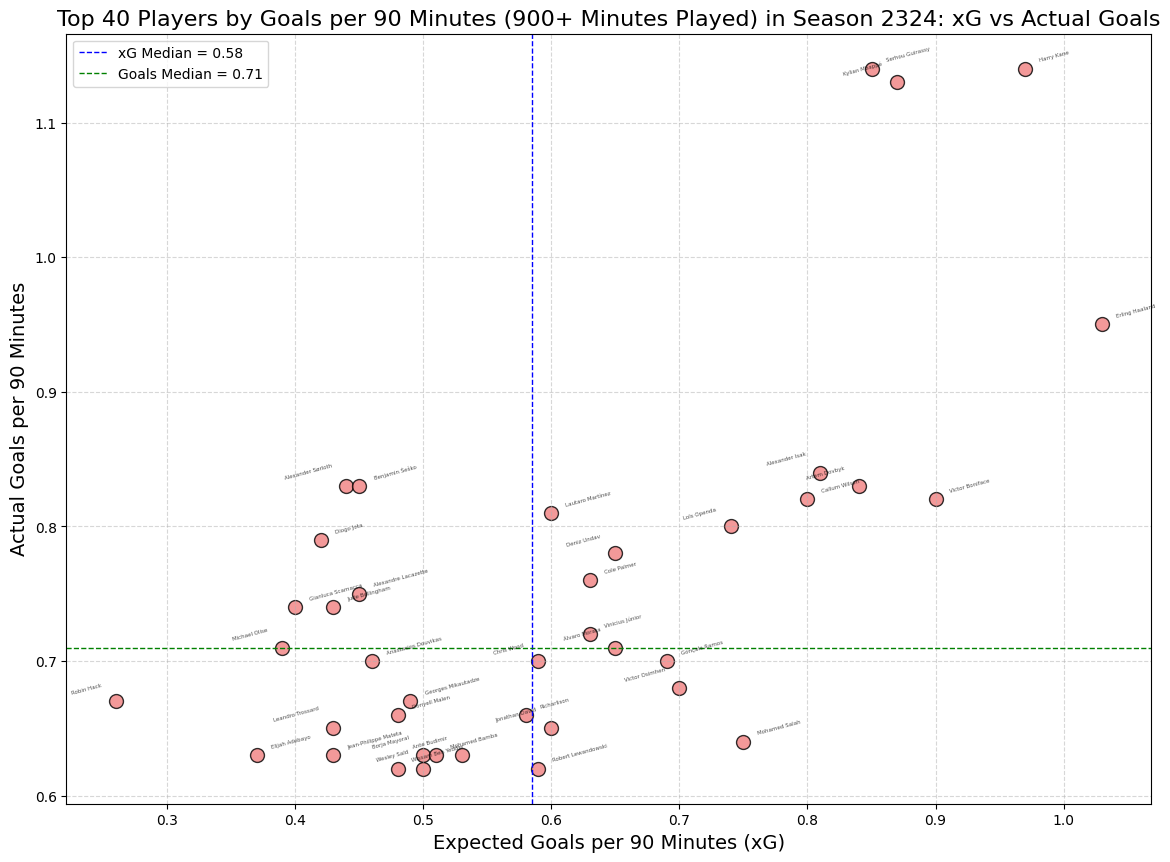

In [ ]:

import matplotlib.pyplot as plt

season_2223_df = player_season_stats_df[player_season_stats_df['season_'] == '2324']
season_2223_df = season_2223_df[['player_', 'team_', 'league_', 'season_', 'Per 90 Minutes_xG', 'Per 90 Minutes_Gls', 'Playing Time_Min']]


top_40_filtered = season_2223_df[season_2223_df['Playing Time_Min'] >= 900].nlargest(40, 'Per 90 Minutes_Gls')



xg_median = top_40_filtered['Per 90 Minutes_xG'].median()
goals_median = top_40_filtered['Per 90 Minutes_Gls'].median()

plt.figure(figsize=(14, 10))
plt.scatter(top_40_filtered['Per 90 Minutes_xG'], top_40_filtered['Per 90 Minutes_Gls'], color='lightcoral', edgecolor='black', s=100, alpha=0.8)
plt.title('Top 40 Players by Goals per 90 Minutes (900+ Minutes Played) in Season 2324: xG vs Actual Goals', fontsize=16)
plt.xlabel('Expected Goals per 90 Minutes (xG)', fontsize=14)
plt.ylabel('Actual Goals per 90 Minutes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(x=xg_median, color='blue', linestyle='--', linewidth=1, label=f'xG Median = {xg_median:.2f}')
plt.axhline(y=goals_median, color='green', linestyle='--', linewidth=1, label=f'Goals Median = {goals_median:.2f}')

for i, row in top_40_filtered.iterrows():
    offset = 10 if i % 2 == 0 else -10
    ha = 'left' if i % 2 == 0 else 'right'
    plt.annotate(row['player_'], 
                 (row['Per 90 Minutes_xG'], row['Per 90 Minutes_Gls']), 
                 textcoords="offset points", 
                 xytext=(offset, 5), 
                 ha=ha, 
                 fontsize=4, 
                 rotation=15, 
                 alpha=0.7)


plt.legend()

plt.show()





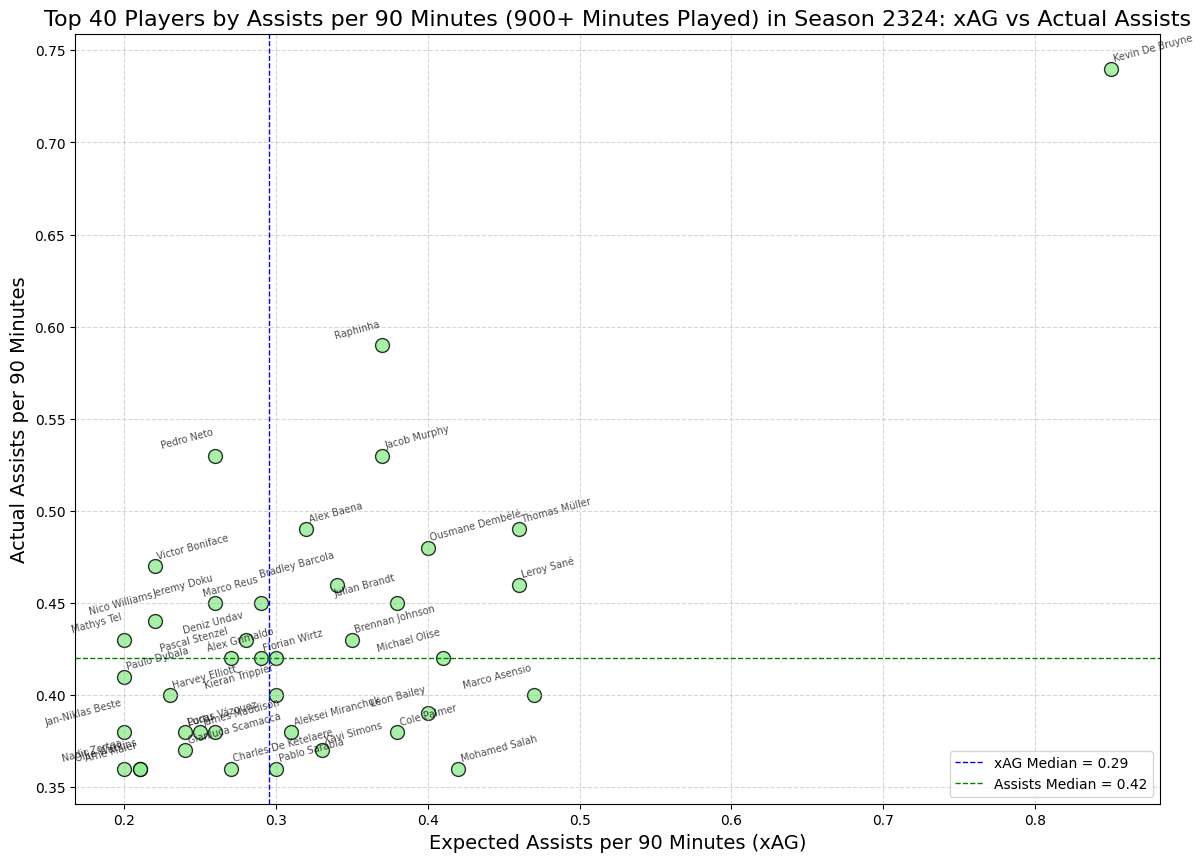

In [ ]:

assists_df_cleaned = assists_df.dropna(subset=['Per 90 Minutes_xAG', 'Per 90 Minutes_Ast', 'Playing Time_Min'])


season_2223_assists_df = assists_df_cleaned[(assists_df_cleaned['season_'] == '2324') & (assists_df_cleaned['Playing Time_Min'] >= 900)]
top_40_assists = season_2223_assists_df.nlargest(40, 'Per 90 Minutes_Ast')

xag_median = top_40_assists['Per 90 Minutes_xAG'].fillna(0).median()
assists_median = top_40_assists['Per 90 Minutes_Ast'].median()


plt.figure(figsize=(14, 10))
plt.scatter(top_40_assists['Per 90 Minutes_xAG'], top_40_assists['Per 90 Minutes_Ast'], color='lightgreen', edgecolor='black', s=100, alpha=0.8)
plt.title('Top 40 Players by Assists per 90 Minutes (900+ Minutes Played) in Season 2324: xAG vs Actual Assists', fontsize=16)
plt.xlabel('Expected Assists per 90 Minutes (xAG)', fontsize=14)
plt.ylabel('Actual Assists per 90 Minutes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)


plt.axvline(x=xag_median, color='blue', linestyle='--', linewidth=1, label=f'xAG Median = {xag_median:.2f}')
plt.axhline(y=assists_median, color='green', linestyle='--', linewidth=1, label=f'Assists Median = {assists_median:.2f}')

for i, row in top_40_assists.iterrows():
    offset = 1 if i % 2 == 0 else -1
    ha = 'left' if i % 2 == 0 else 'right'
    plt.annotate(row['player_'], 
                 (row['Per 90 Minutes_xAG'], row['Per 90 Minutes_Ast']), 
                 textcoords="offset points", 
                 xytext=(offset, 5), 
                 ha=ha, 
                 fontsize=7, 
                 rotation=15, 
                 alpha=0.7)

# Adding legend for median lines
plt.legend()

plt.show()


In [66]:
player_season_stats_df[:1]

,league_,season_,team_,player_,nation_,pos_,age_,born_,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Per 90 Minutes_xG+xA
0,ENG-Premier League,1718,Arsenal,Aaron Ramsey,WAL,MF,26,1990,24,21,1846,20.5,7,8,15,7,0,0,0,0,6.1,6.1,5.4,11.5,61,134,161,0.34,0.39,0.73,0.34,0.73,0.3,0.26,0.56,0.3,0.56,0.56


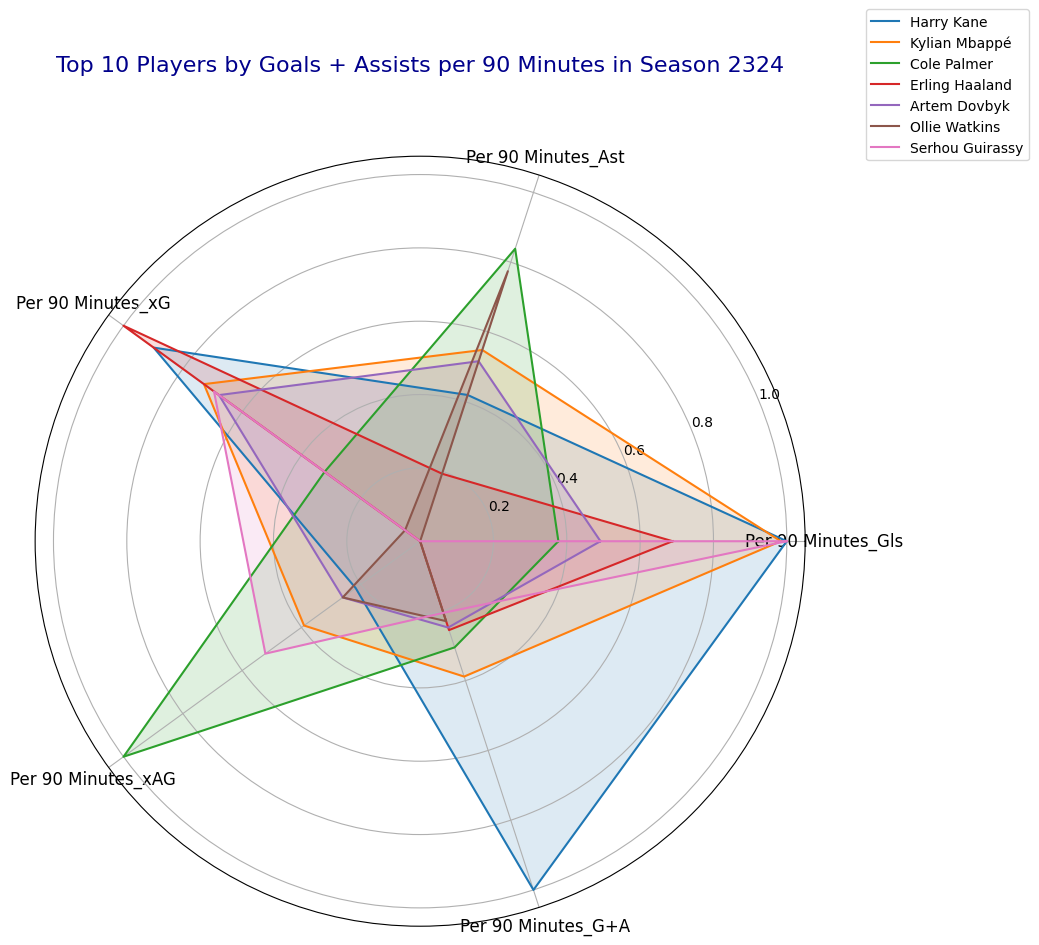

In [ ]:

player_season_stats_df['Per 90 Minutes_G+A'] = player_season_stats_df['Per 90 Minutes_Gls'] + player_season_stats_df['Performance_G+A']


top_10_ga_players = player_season_stats_df[(player_season_stats_df['season_'] == '2324')].nlargest(10, 'Per 90 Minutes_G+A')


top_10_ga_players = top_10_ga_players[['player_', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 
                                       'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_G+A']]


top_10_scaled = top_10_ga_players.copy()
top_10_scaled[['Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_G+A']] = scaler.fit_transform(

top_10_players_radar = top_10_scaled.set_index('player_').head(7)


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))


for i, player in enumerate(top_10_players_radar.index):
    values = top_10_players_radar.loc[player].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=player)
    ax.fill(angles, values, alpha=0.15)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_10_players_radar.columns, fontsize=12)


plt.title('Top 10 Players by Goals + Assists per 90 Minutes in Season 2324', size=16, color='darkblue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.2))

plt.show()


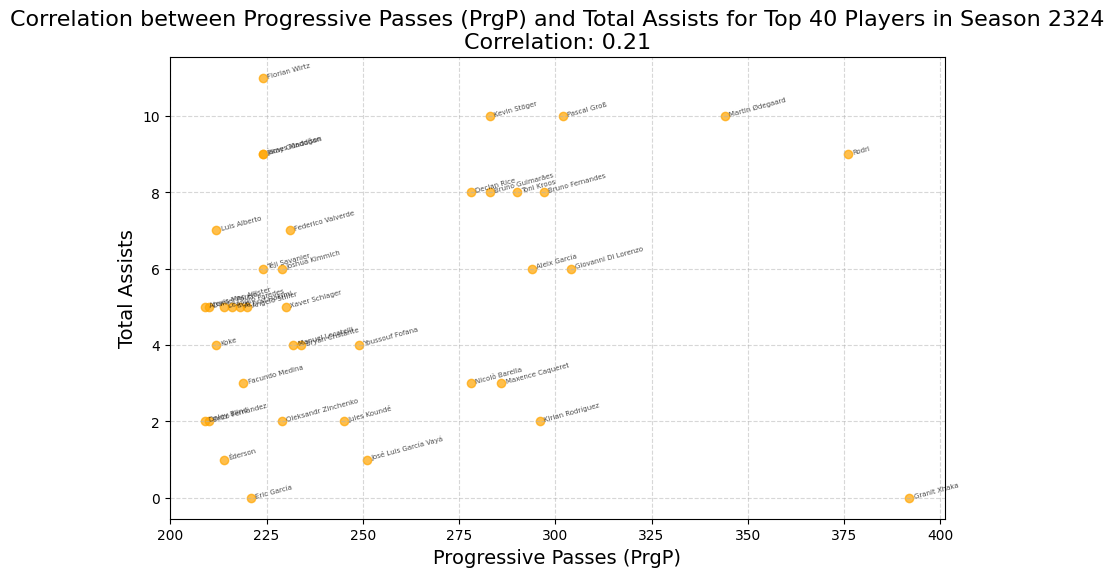

In [ ]:

top_40_progressive_passes_2324 = player_season_stats_df[(player_season_stats_df['season_'] == '2324')].nlargest(40, 'Progression_PrgP')[['player_', 'Progression_PrgP', 'Performance_Ast']]

top_40_correlation_value_2324 = top_40_progressive_passes_2324['Progression_PrgP'].corr(top_40_progressive_passes_2324['Performance_Ast'])

plt.figure(figsize=(10, 6))
plt.scatter(top_40_progressive_passes_2324['Progression_PrgP'], top_40_progressive_passes_2324['Performance_Ast'], alpha=0.7, color='orange')
plt.title(f"Correlation between Progressive Passes (PrgP) and Total Assists for Top 40 Players in Season 2324\nCorrelation: {top_40_correlation_value_2324:.2f}", fontsize=16)
plt.xlabel('Progressive Passes (PrgP)', fontsize=14)
plt.ylabel('Total Assists', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

for i, row in top_40_progressive_passes_2324.iterrows():
    plt.text(row['Progression_PrgP'] + 1, row['Performance_Ast'], row['player_'], fontsize=5, alpha=0.7, rotation = 15)

plt.show()


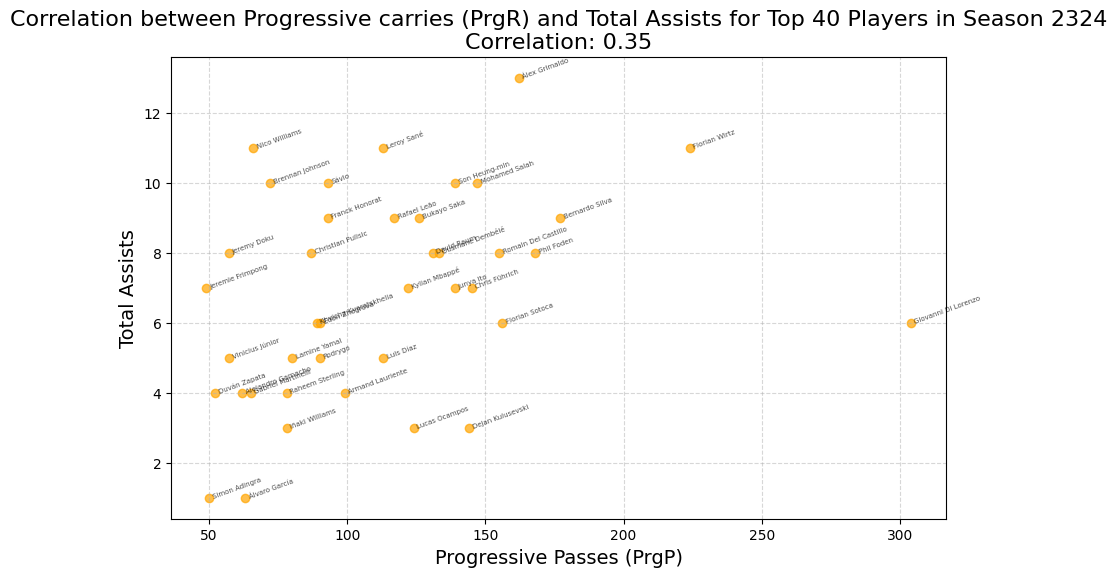

In [ ]:

top_40_progressive_passes_2324 = player_season_stats_df[(player_season_stats_df['season_'] == '2324')].nlargest(40, 'Progression_PrgR')[['player_', 'Progression_PrgP', 'Performance_Ast']]

top_40_correlation_value_2324 = top_40_progressive_passes_2324['Progression_PrgP'].corr(top_40_progressive_passes_2324['Performance_Ast'])

plt.figure(figsize=(10, 6))
plt.scatter(top_40_progressive_passes_2324['Progression_PrgP'], top_40_progressive_passes_2324['Performance_Ast'], alpha=0.7, color='orange')
plt.title(f"Correlation between Progressive carries (PrgR) and Total Assists for Top 40 Players in Season 2324\nCorrelation: {top_40_correlation_value_2324:.2f}", fontsize=16)
plt.xlabel('Progressive Passes (PrgP)', fontsize=14)
plt.ylabel('Total Assists', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)


for i, row in top_40_progressive_passes_2324.iterrows():
    plt.text(row['Progression_PrgP'] + 1, row['Performance_Ast'], row['player_'], fontsize=5, alpha=0.7, rotation = 20)

plt.show()
